In [1]:
##############################################################################################################
# DESCRIPTION: 
# RESULTS:     
#              
##############################################################################################################

In [2]:
######################
# CONFIG & HYPERPARAMS
######################

import os

class HyperParams:
    pass

IMG_PATH = "C:/Projects/VenusDenoise/dataset/cases/64/0100_1000/"

IMG_PATH_VALID = IMG_PATH + "validation/"
IMG_PATH_TEST = IMG_PATH + "test/"
IMG_PATH_TRAIN = IMG_PATH

hyperparams = HyperParams()
hyperparams.IMG_WIDTH = 64
hyperparams.IMG_HEIGHT = 64
hyperparams.EPOCHS = 320
hyperparams.BATCH_SIZE = 32

hyperparams.LOSS = 'mae_nz'

IMG_WIDTH = hyperparams.IMG_WIDTH
IMG_HEIGHT = hyperparams.IMG_HEIGHT

IMG_CASE = str(IMG_WIDTH) +  "/0100_1000"
MODEL_NAME = "0100_1000-64-convsim-c3"

DEST_TESTS = os.path.abspath(os.path.join('../../../out_tests/', MODEL_NAME))

class RadianceLimits:
    pass
radiance_limits = RadianceLimits()
radiance_limits.noisy_min = 0
radiance_limits.noisy_max = 0.0898
radiance_limits.nitid_min = 0
radiance_limits.nitid_max = 0.3248

from tensorflow.keras.optimizers import RMSprop
hyperparams.OPTIMIZER = RMSprop(learning_rate=0.0005)

In [3]:
##################
# IMPORTS
##################

import tensorflow as tf
config = tf.compat.v1.ConfigProto()
config.gpu_options.allow_growth = True
sess = tf.compat.v1.Session(config=config)

import numpy as np
import tensorflow 
from numpy.random import seed
seed(1)
tensorflow.random.set_seed(2)
import os, sys
module_path = os.path.abspath(os.path.join('../../support/'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
import DatasetUtilsTifF as dsutils
import TrainModelC as train
import ReportsK as reports
import ConvSimG as model_factory

In [4]:
##################
# MODEL DEFINITION
##################
model = model_factory.buildModel(hyperparams)
model.summary()
model.optimizer.get_config()
model.optimizer.get_config()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 64, 64, 1)]  0                                            
__________________________________________________________________________________________________
conv2d_2 (Conv2D)               (None, 32, 32, 32)   544         input_1[0][0]                    
__________________________________________________________________________________________________
activation_4 (Activation)       (None, 32, 32, 32)   0           conv2d_2[0][0]                   
__________________________________________________________________________________________________
conv2d_3 (Conv2D)               (None, 16, 16, 16)   8208        activation_4[0][0]               
______________________________________________________________________________________________

{'name': 'RMSprop',
 'learning_rate': 0.0005,
 'decay': 0.0,
 'rho': 0.9,
 'momentum': 0.0,
 'epsilon': 1e-07,
 'centered': False}

In [5]:
##################
# PREPARE DATA
##################

train_noisy_files, train_nitid_files, train_noisy, train_nitid = dsutils.readDataset( IMG_PATH_TRAIN, hyperparams.IMG_WIDTH, hyperparams.IMG_HEIGHT, radiance_limits)
val_noisy_files, val_nitid_files, val_noisy, val_nitid = dsutils.readDataset( IMG_PATH_VALID, hyperparams.IMG_WIDTH, hyperparams.IMG_HEIGHT, radiance_limits)

train_noisy, train_nitid = dsutils.reshapeDataset( train_noisy, train_nitid, hyperparams.IMG_WIDTH, hyperparams.IMG_HEIGHT )
val_noisy, val_nitid = dsutils.reshapeDataset( val_noisy, val_nitid, hyperparams.IMG_WIDTH, hyperparams.IMG_HEIGHT )

Read dataset. Path: C:/Projects/VenusDenoise/dataset/cases/64/0100_1000/
Noisy files:8886
Nitid files:8886
Read dataset. Path: C:/Projects/VenusDenoise/dataset/cases/64/0100_1000/validation/
Noisy files:2209
Nitid files:2209


In [6]:
##################
# TRAIN MODEL
##################
import tensorflow as tf
from tensorflow.compat.v1.keras.backend import set_session
config = tf.compat.v1.ConfigProto()
config.gpu_options.allow_growth = True  # dynamically grow the memory used on the GPU
config.log_device_placement = True  # to log device placement (on which device the operation ran)
sess = tf.compat.v1.Session(config=config)
set_session(sess)


hist = train.fit( model, hyperparams, train_noisy, train_nitid, val_noisy, val_nitid )

Device mapping:
/job:localhost/replica:0/task:0/device:GPU:0 -> device: 0, name: NVIDIA GeForce RTX 3070 Ti, pci bus id: 0000:2b:00.0, compute capability: 8.6

Epoch 1/320
278/278 [==============================] - 7s 10ms/step - loss: 0.0013 - val_loss: 7.8128e-04
Epoch 2/320
278/278 [==============================] - 3s 9ms/step - loss: 9.2927e-04 - val_loss: 7.2335e-04
Epoch 3/320
278/278 [==============================] - 3s 10ms/step - loss: 8.8400e-04 - val_loss: 8.4294e-04
Epoch 4/320
278/278 [==============================] - 3s 10ms/step - loss: 8.6137e-04 - val_loss: 7.7047e-04
Epoch 5/320
278/278 [==============================] - 3s 9ms/step - loss: 8.4759e-04 - val_loss: 7.2512e-04
Epoch 6/320
278/278 [==============================] - 3s 10ms/step - loss: 8.3780e-04 - val_loss: 7.1002e-04
Epoch 7/320
278/278 [==============================] - 3s 9ms/step - loss: 8.3112e-04 - val_loss: 7.5026e-04
Epoch 8/320
278/278 [==============================] - 3s 9ms/step - loss: 8.

Epoch 74/320
278/278 [==============================] - 3s 10ms/step - loss: 6.8146e-04 - val_loss: 7.3896e-04
Epoch 75/320
278/278 [==============================] - 3s 10ms/step - loss: 6.7988e-04 - val_loss: 6.9401e-04
Epoch 76/320
278/278 [==============================] - 3s 10ms/step - loss: 6.7915e-04 - val_loss: 6.7545e-04
Epoch 77/320
278/278 [==============================] - 3s 9ms/step - loss: 6.7980e-04 - val_loss: 6.9088e-04
Epoch 78/320
278/278 [==============================] - 3s 9ms/step - loss: 6.8059e-04 - val_loss: 6.7604e-04
Epoch 79/320
278/278 [==============================] - 3s 10ms/step - loss: 6.7645e-04 - val_loss: 7.7211e-04
Epoch 80/320
278/278 [==============================] - 3s 9ms/step - loss: 6.7874e-04 - val_loss: 6.7509e-04
Epoch 81/320
278/278 [==============================] - 3s 9ms/step - loss: 6.7578e-04 - val_loss: 6.5127e-04
Epoch 82/320
278/278 [==============================] - 3s 10ms/step - loss: 6.7505e-04 - val_loss: 6.6165e-04
Epoch

Epoch 148/320
278/278 [==============================] - 3s 9ms/step - loss: 6.4039e-04 - val_loss: 7.3304e-04
Epoch 149/320
278/278 [==============================] - 3s 10ms/step - loss: 6.4207e-04 - val_loss: 6.3092e-04
Epoch 150/320
278/278 [==============================] - 3s 9ms/step - loss: 6.4077e-04 - val_loss: 7.0120e-04
Epoch 151/320
278/278 [==============================] - 3s 9ms/step - loss: 6.3980e-04 - val_loss: 6.6279e-04
Epoch 152/320
278/278 [==============================] - 3s 10ms/step - loss: 6.4182e-04 - val_loss: 6.4027e-04
Epoch 153/320
278/278 [==============================] - 3s 9ms/step - loss: 6.4063e-04 - val_loss: 7.3244e-04
Epoch 154/320
278/278 [==============================] - 3s 9ms/step - loss: 6.3879e-04 - val_loss: 8.2582e-04
Epoch 155/320
278/278 [==============================] - 3s 10ms/step - loss: 6.3968e-04 - val_loss: 9.2451e-04
Epoch 156/320
278/278 [==============================] - 3s 10ms/step - loss: 6.3866e-04 - val_loss: 6.5628e-

278/278 [==============================] - 3s 9ms/step - loss: 6.1811e-04 - val_loss: 6.3480e-04
Epoch 222/320
278/278 [==============================] - 3s 10ms/step - loss: 6.1956e-04 - val_loss: 7.3669e-04
Epoch 223/320
278/278 [==============================] - 3s 10ms/step - loss: 6.2131e-04 - val_loss: 6.3110e-04
Epoch 224/320
278/278 [==============================] - 3s 9ms/step - loss: 6.1602e-04 - val_loss: 6.3041e-04
Epoch 225/320
278/278 [==============================] - 3s 9ms/step - loss: 6.1369e-04 - val_loss: 6.7118e-04
Epoch 226/320
278/278 [==============================] - 3s 9ms/step - loss: 6.1763e-04 - val_loss: 6.2578e-04
Epoch 227/320
278/278 [==============================] - 3s 9ms/step - loss: 6.1752e-04 - val_loss: 6.8240e-04
Epoch 228/320
278/278 [==============================] - 3s 10ms/step - loss: 6.1689e-04 - val_loss: 6.9095e-04
Epoch 229/320
278/278 [==============================] - 3s 9ms/step - loss: 6.1650e-04 - val_loss: 6.4914e-04
Epoch 230/32

278/278 [==============================] - 3s 9ms/step - loss: 6.0468e-04 - val_loss: 7.8178e-04
Epoch 295/320
278/278 [==============================] - 3s 10ms/step - loss: 6.0420e-04 - val_loss: 6.2131e-04
Epoch 296/320
278/278 [==============================] - 3s 9ms/step - loss: 6.0343e-04 - val_loss: 6.5050e-04
Epoch 297/320
278/278 [==============================] - 3s 9ms/step - loss: 6.0375e-04 - val_loss: 6.2155e-04
Epoch 298/320
278/278 [==============================] - 3s 9ms/step - loss: 6.0241e-04 - val_loss: 6.6538e-04
Epoch 299/320
278/278 [==============================] - 3s 9ms/step - loss: 6.0313e-04 - val_loss: 6.3273e-04
Epoch 300/320
278/278 [==============================] - 3s 9ms/step - loss: 6.0300e-04 - val_loss: 6.4459e-04
Epoch 301/320
278/278 [==============================] - 3s 9ms/step - loss: 6.0452e-04 - val_loss: 6.3799e-04
Epoch 302/320
278/278 [==============================] - 3s 9ms/step - loss: 6.0376e-04 - val_loss: 6.1772e-04
Epoch 303/320


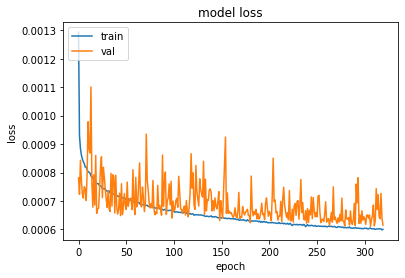

In [7]:
##################
# REPORTS
##################
reports.plotHistory( hist )

In [8]:
model.save(os.path.abspath(os.path.join('../../../saves/', MODEL_NAME)), model)

INFO:tensorflow:Assets written to: C:\Projects\VenusDenoise\saves\0100_1000-64-convsim-c3\assets


C:\Users\rdelasheras\Anaconda3\envs\tf-gpu\lib\site-packages\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '
